In [2]:
import numpy as np
import matplotlib.pyplot as plt
import batman
import astropy
from astropy.time import Time
import h5py

from mc3.stats import time_avg
from astropy import units as u
from astropy.visualization import quantity_support
import matplotlib.patches as patches

In [14]:
eclipse = ['1'] #['2'] #['3'] # open one at a time 
aperture = ['4', '40']
segments = ['0000', '0001', '0002', '0003', '0004']

# Initialize dictionaries to hold arrays for each aperture
time_arr = {a: [] for a in aperture}
aplev_arr = {a: [] for a in aperture}
aperr_arr = {a: [] for a in aperture}
centroid_x_arr = {a: [] for a in aperture}
centroid_y_arr = {a: [] for a in aperture}
flux = {a: [] for a in aperture}

path_to_files = '/Users/alexandrarochon/Downloads'

for a in aperture:
    for seg in segments:
        if a == '4':
            path = path_to_files+'/LC_JWST_proposal/eclipse'+eclipse[0]+'/'+'ap'+a+'_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        else:
            path = path_to_files+'/LC_JWST_proposal/eclipse1/'+'ap'+a+'_bg42_62/S3_lhs1140c_ap' + a + '_bg42_62_FluxData_seg'+seg+'.h5'
        with h5py.File(path, 'r') as file:     # open the file
            #print(list(file.keys()))
            time_arr[a] = np.append(time_arr[a], np.array(file['time']))
            aplev_arr[a] = np.append(aplev_arr[a], np.array(file['aplev']))
            flux[a] = np.append(flux[a], np.array(file['flux']))
            aperr_arr[a] = np.append(aperr_arr[a], np.array(file['aperr']))
            centroid_x_arr[a] = np.append(centroid_x_arr[a], np.array(file['centroid_x']))
            centroid_y_arr[a] = np.append(centroid_y_arr[a], np.array(file['centroid_y']))

    time_arr[a] = np.array(time_arr[a])
    aplev_arr[a] = np.array(aplev_arr[a])
    aperr_arr[a] = np.array(aperr_arr[a])
    centroid_x_arr[a] = np.array(centroid_x_arr[a])
    centroid_y_arr[a] = np.array(centroid_y_arr[a])
    
print(aplev_arr['4'])

[54263.38348389 54705.99819946 54679.03097534 ... 54477.53118896
 54439.22715759 54497.03846741]


<ErrorbarContainer object of 3 artists>

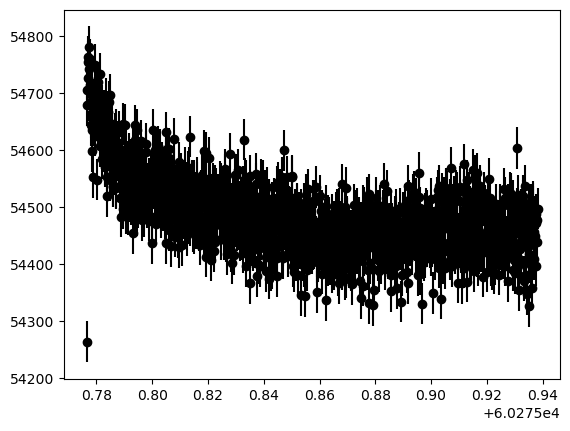

In [13]:
plt.errorbar(time_arr['4'], aplev_arr['4'], yerr=aperr_arr['4'], fmt='o', color='black', label='Aperture 4')


In [5]:
print(aplev_arr)

{'4': array([54263.38348389, 54705.99819946, 54679.03097534, ...,
       54477.53118896, 54439.22715759, 54497.03846741]), '40': array([78249.27914429, 79268.1721344 , 79311.24129486, ...,
       78633.76676941, 78375.88345337, 79224.68304443])}


In [122]:
aplev = {a: [] for a in aperture}
aperr = {a: [] for a in aperture}
time = time_arr
centroid_x = centroid_x_arr
centroid_y = centroid_y_arr

for a in aperture:
    aperr[a] = aperr_arr[a] / np.mean(aplev_arr[a])
    aplev[a] = aplev_arr[a] / np.mean(aplev_arr[a])

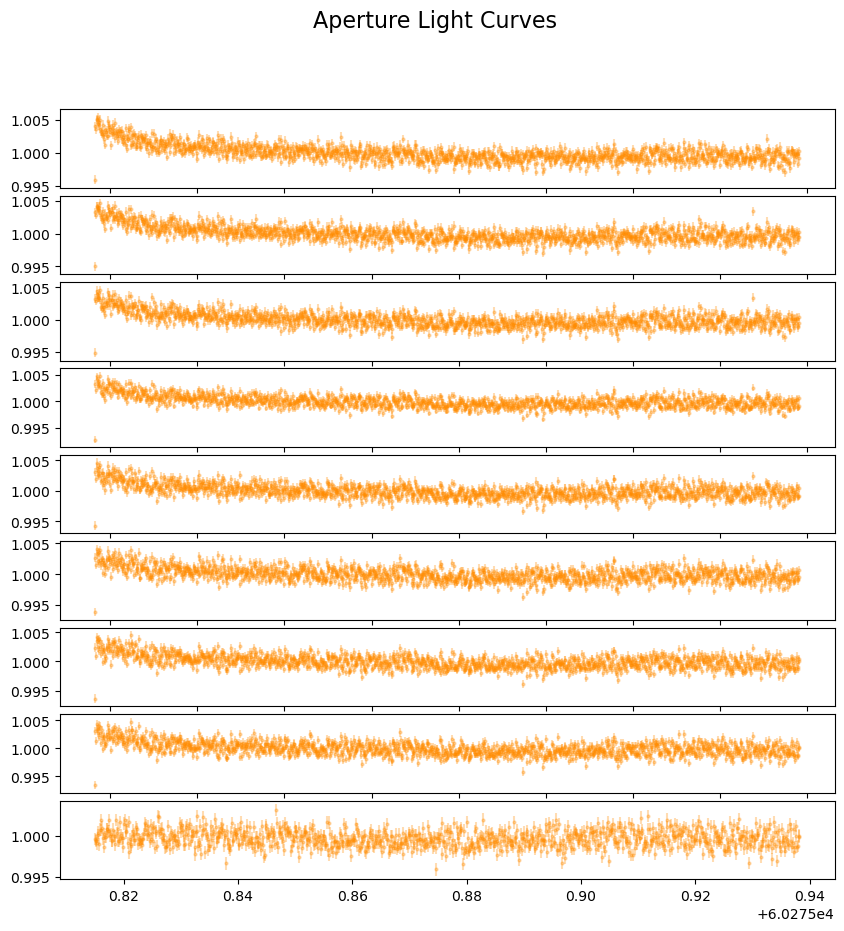

In [106]:
time = time_arr

fig, ax = plt.subplots(len(aperture), 1)
fig.subplots_adjust(hspace=0.1)
fig.suptitle('Aperture Light Curves', fontsize=16)
#adjust the size of the figure
fig.set_size_inches(10, 10)
i = 0
for a in aperture:
    ax[i].errorbar(time[a], aplev[a], yerr=aperr[a], color='darkorange',markersize=2, alpha=0.3, fmt='o')
    i=i+1

# plt.errorbar(time, aplev, yerr=aperr, color='darkorange',markersize=2, alpha=0.3, fmt='o')
# plt.xlabel('Time (MJD)')
# plt.ylabel('Normalized Flux')

In [25]:
def binValues(values, binAxisValues, nbin, assumeWhiteNoise=True):
    """Bin values and compute their binned noise.

    Args:
        values (ndarray): An array of values to bin.
        binAxisValues (ndarray): Values of the axis along which binning will occur.
        nbin (int): The number of bins desired.
        assumeWhiteNoise (bool, optional): Divide binned noise by sqrt(nbinned) (True) or not (False, default).

    Returns:
        tuple: binned (ndarray; the binned values),
            binnedErr (ndarray; the binned errors)
    
    """
    
    bins = np.linspace(np.nanmin(binAxisValues), np.nanmax(binAxisValues), nbin)
    digitized = np.digitize(binAxisValues, bins)
    binned = np.array([np.nanmedian(values[digitized == i]) for i in range(1, nbin)])
    binnedErr = np.nanmean(np.array([np.nanstd(values[digitized == i]) for i in range(1, nbin)]))
    if assumeWhiteNoise:
        binnedErr /= np.sqrt(len(values)/nbin)
    return binned, binnedErr

In [123]:
nbin = 28
ndiscard = 300 # removes ... mins

bins_time = {a: [] for a in aperture}
bins_aplev = {a: [] for a in aperture}
bins_aperr = {a: [] for a in aperture}
binErr_t = {a: [] for a in aperture}
binErr_aplev = {a: [] for a in aperture}
binErr_aperr = {a: [] for a in aperture}

# remove more points to get the ramp out...
for a in aperture:
    bins_time[a], binErr_t[a] = binValues(time[a][ndiscard:], time[a][ndiscard:], nbin)
    bins_aplev[a], binErr_aplev[a] = binValues(aplev[a][ndiscard:], time[a][ndiscard:], nbin)
    bins_aperr[a], binErr_aperr[a] = binValues(aperr[a][ndiscard:], time[a][ndiscard:], nbin)

for a in aperture:
    # unbnned
    time[a] = time[a][ndiscard:]
    aplev[a] = aplev[a][ndiscard:]
    aperr[a] = aperr[a][ndiscard:]
    centroid_x[a] = centroid_x[a][ndiscard:]
    centroid_y[a] = centroid_y[a][ndiscard:]

962
962
962
962
962
962
962
962
962


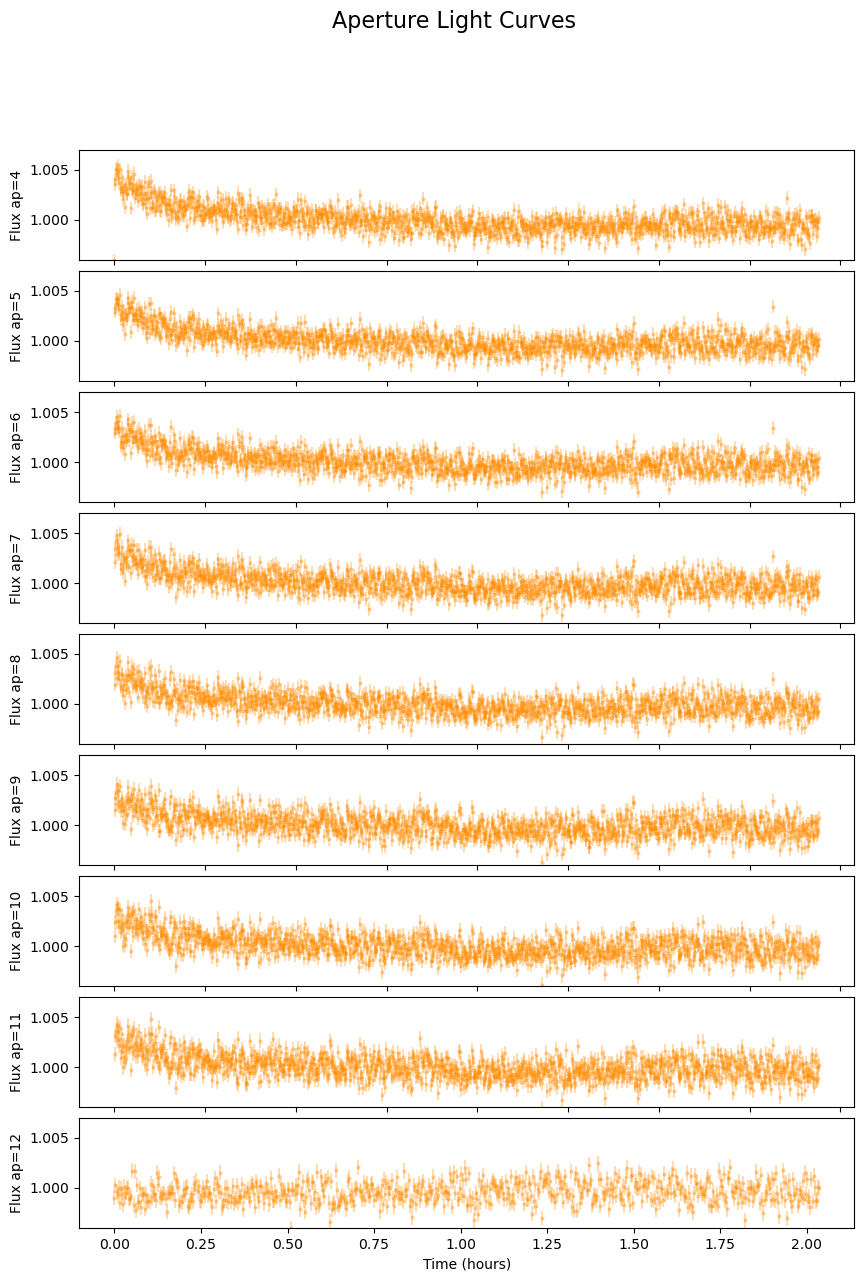

In [108]:
fig, ax = plt.subplots(len(aperture), 1)
fig.subplots_adjust(hspace=0.1)
fig.suptitle('Aperture Light Curves', fontsize=16)
#adjust the size of the figure
fig.set_size_inches(10, 14)
i = 0
for a in aperture:
    ax[i].errorbar((time[a]-time[a][0])*(24), aplev[a], yerr=aperr[a], color='darkorange',markersize=2, alpha=0.3, fmt='o')
    ax[i].set_xlabel('Time (hours)')
    ax[i].set_ylabel('Flux ap='+a+'')
    ax[i].set_ylim(0.996, 1.007)
    i=i+1

# plt.errorbar((time-time[0])*(24), aplev, yerr=aperr, alpha=0.3, color='darkorange')
# plt.xlabel('Time (hours)')
# plt.ylabel('Normalized Flux')
# plt.ylim(0.996, 1.0045)
# plt.figure()
# plt.errorbar((bins_time-time[0])*(24), bins_aplev, yerr=binErr_aplev, fmt='o', color='darkorange')
# plt.xlabel('Time (hours)')
# plt.ylabel('Normalized Flux')
# plt.ylim(0.996, 1.0045)


In [109]:
# remove eclipse pts from binned
eclipse = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
transit = Time('2458389.293900', format = 'jd', scale = 'tdb')
e_dur_days = 1.13 / 24
start = eclipse - e_dur_days / 2  # Center the rectangle at the start of the eclipse
start = start.mjd

# from binned data
ind1 = np.abs(bins_time['4'] - start).argmin()
ind2 = np.abs(bins_time['4'] - (start + e_dur_days)).argmin()

for a in aperture:
    bins_time[a] = np.delete(bins_time[a], np.arange(ind1,ind2))
    bins_aplev[a] = np.delete(bins_aplev[a], np.arange(ind1,ind2))
    bins_aperr[a] = np.delete(bins_aperr[a], np.arange(ind1,ind2))

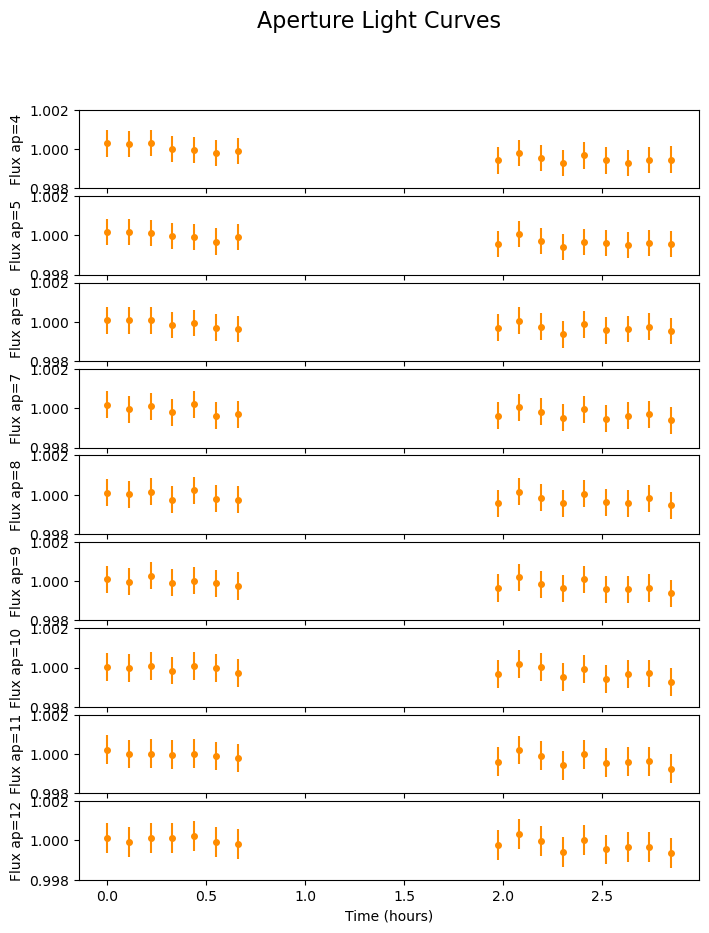

In [56]:
# plot binned data without eclipse
fig, ax = plt.subplots(len(aperture), 1)
fig.subplots_adjust(hspace=0.1)
fig.suptitle('Aperture Light Curves', fontsize=16)
#adjust the size of the figure
fig.set_size_inches(8, 10)
i = 0
for a in aperture:
    ax[i].errorbar((bins_time[a]-bins_time[a][0])*(24), bins_aplev[a], yerr=bins_aperr[a], color='darkorange',markersize=4, fmt='o')
    ax[i].set_xlabel('Time (hours)')
    ax[i].set_ylabel('Flux ap='+a+'')
    ax[i].set_ylim(0.998, 1.002)
    i=i+1

# plt.figure()
# plt.errorbar((bins_time-time[0])*(24), bins_aplev, yerr=binErr_aplev, fmt='o', color='darkorange')

In [125]:
def detec_model_poly(xdata, ydata, c1, c2, c3, c4, c5, c6):

    x, y = xdata, ydata
    pos = np.vstack((np.ones_like(x),
                     x   ,      y,
                     x**2, x   *y,      y**2))
    detec = np.array([c1, c2, c3, c4, c5, c6])
    return np.dot(detec[np.newaxis,:], pos).reshape(-1)

def signal(time, xdata, ydata, t_s, fp, c1, c2, c3, c4, c5, c6):

    astro = transit_model(time, t_s, fp)
    detec = detec_model_poly(xdata, ydata, c1, c2, c3, c4, c5, c6)

    return astro*detec


In [126]:
def transit_model(time, t_s, fp):
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 58388.7939                #time of inferior conjunction
    params.per = 3.777940                 #orbital period
    params.rp = 0.0539                   #planet radius (in units of stellar radii) # check that this is ratio of radii -> 0.0539 is charles value
    params.a = 26.57                      #semi-major axis (in units of stellar radii)
    params.inc = 89.8                     #orbital inclination (in degrees)
    params.ecc = 0.                       #eccentricity
    params.w = 90.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.16, 0.22]               #limb darkening coefficients, values from cadieux 2024b
    params.fp = fp                        #planet to star flux ratio
    params.t_secondary = t_s

    m = batman.TransitModel(params, time, transittype="secondary")
    flux = m.light_curve(params)
    return flux

In [131]:
#t_s = Time('2024-07-07 18:34', format = 'iso', scale = 'tdb')
t_s = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
#t_s = Time('2024-07-19 02:34', format = 'iso', scale = 'tdb')
t_s = t_s.mjd 
print(t_s)
t_s = 60275.875 # e3 60510.106944444444 #60498.77361111111 e2 #60275.875 e1
fp = 0.000230
eclipse = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
eclipse = eclipse.mjd
e_dur = 1.13 # hours
e_dur_days = 1.13 / 24
print(eclipse)
p0_astro = np.array([t_s, fp]) 
p0_detec = np.array([0.5, 0.1, 0.1, -0.1, 0.1, 0.1])

60275.875
60275.875
